<a href="https://colab.research.google.com/github/lorransr/CAT/blob/master/Acidentes_de_Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama dos acidentes de Trabalho no Brasil

O observatório geral da saude e segurança  do trabalho estima que do periodo de 2017 até maio de 2019, são registrados 1 acidente a cada 54 segundos no país. Desse valor, estima-se também que 1 morte aconteça a cada 4 horas. Entender onde, com quem, quando e como ocorrem os acidentes de trabalho são os primeiros passos para nortearmos políticas públicas de prevenção de acidentes.

Com isso em mente minha proposta é realizar uma analise, a partir das bases de dados disponibilizadas, através do portal da transparência, pela previdência social a respeito dos Acidentes do Trabalho ocorridos no pais.

A princípio foram adquiridas 8 bases de dados, com diferentes recortes a respeito do tema. Elas são:
1. Acidentes de Trabalho por UF
2. Acidentes de Trabalho por mês
3. Acidentes de Trabalho por faixa-etaria e sexo
4. Acidentes de Trabalho por parte do corpo atingida
5. Acidentes de Trabalho por CNAE (95)
6. Acidentes de Trabalho por CNAE (2.0)
7. Acidentes de Trabalho por CID
8. Acidentes de Trabalho por CBO

Todas as bases de dados estão segmentadas por ano. Todas contêm algum indicativo da situação de haver ou não CAT registrada. Igualmente, todas possuem um campo com a tipificação do acidente, seja ele típico, de trajeto ou uma doença de trabalho.

### Mas Afinal, o que é a CAT?

A comunicação de acidente de trabalho (CAT) é um documento emitido para reconhecer tanto um **acidente de trabalho** ou **de trajeto** bem como uma **doença ocupacional**.
Aqui vale a definição desses termos:

* Acidente de trabalho ou de trajeto:é o acidente ocorrido no exercício da atividade profissional a serviço da empresa ou no deslocamento residência -> trabalho -> residência. 

*  Doença ocupacional: é aquela produzida ou desencadeada pelo exercício do trabalho peculiar a determinada atividade e constante da respectiva relação elaborada pelo Ministério do Trabalho e da Previdência Social.

A CAT é um documento obrigatório e possui um prazo de emissão curto. Mesmo que não haja afastamento, a CAT deve ser emitida até o primeiro dia útil seguinte ao da ocorrência. Sob o risco de multa. Por conta desta característica a base de dados do INSS é extramemente útil e pouco defasada da realidade brasileira, portanto um bom instrumento para análise.

explicar melhor os seguintes termos:
* CNAE 
* CID
* CBO

## Acidentes de Trabalho por UF

O primeiro dataset a ser estudado será o que diz respeito aos acidentes de trabalho por unidade federal. Com essa base de dados pretendo responder a pergunta: "Onde ocorrem os acidentes de trabalho?". Também sera mostrado a evolução ao longo do tempo para as principais regiões.

In [1]:
!pip install seaborn==0.9.0

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

In [0]:
#importando os dados para o Colab
url = "https://raw.githubusercontent.com/lorransr/CAT/master/ACT-uf.csv"

In [0]:
#Salvando o dataframe
df_uf = pd.read_csv(url, sep=",", encoding = "latin-1")

In [5]:
#renomeando as colunas
df_uf.columns = ['ano','estado','motivo/situação','qtd_acidentes']
df_uf.head()

,ano,estado,motivo/situação,qtd_acidentes
0,1988,Rondônia,Típico-Com Cat,592.0
1,1988,Acre,Típico-Com Cat,115.0
2,1988,Amazonas,Típico-Com Cat,5173.0
3,1988,Pará,Típico-Com Cat,12172.0
4,1988,Maranhão,Típico-Com Cat,5916.0


In [6]:
#Contando a quantidade de valores nulos
df_uf.isna().sum()

ano                0
estado             0
motivo/situação    0
qtd_acidentes      1
dtype: int64

Uma vez que existe apenas uma linha, em 2893 registros, contendo valores nulos, ela será descartada

In [0]:
#excluindo valores nulos
df_uf.dropna(inplace=True) 

Para poder ter uma ideia da distribuição dos acidentes ao redor do pais é preciso primeiro vincular os estados na base de dados a uma latitude e longitude. A partir desse repositório no GitHub, foi possivel encontrar uma base consistente com algumas informações adicionais a respeito dos estados:https://github.com/kelvins/Municipios-Brasileiros/

In [0]:
url = "https://raw.githubusercontent.com/lorransr/CAT/master/brasil.csv"
#importando dataframe com lat e lon
dim_uf = pd.read_csv(url, sep=",")

In [9]:
dim_uf.head()

,ibge,municipio,latitude,longitude,cod_estado,estado,uf,regiao,capital
0,520005,Abadia de Goiás,-16.75730,-49.4412,52,Goiás,GO,Centro-Oeste,0
1,310010,Abadia dos Dourados,-18.48310,-47.3916,31,Minas Gerais,MG,Sudeste,0
2,520010,Abadiânia,-16.19700,-48.7057,52,Goiás,GO,Centro-Oeste,0
3,310020,Abaeté,-19.15510,-45.4444,31,Minas Gerais,MG,Sudeste,0
4,150010,Abaetetuba,-1.72183,-48.8788,15,Pará,PA,Norte,0


In [10]:
#selecionando as colunas que firão no df
selected_columns=['latitude', 'longitude', 'cod_estado', 'estado',
       'uf', 'regiao', 'capital']
dim_uf = dim_uf[selected_columns]
#selecionando apenas as capitais
dim_uf = dim_uf[dim_uf["capital"]==1]
#removendo duplicadas
dim_uf.drop_duplicates(subset = "cod_estado",inplace=True)
dim_uf.drop("capital",axis=1,inplace=True)
dim_uf.head()

,latitude,longitude,cod_estado,estado,uf,regiao
294,-10.90910,-37.0677,28,Sergipe,SE,Nordeste
580,-1.45540,-48.4898,15,Pará,PA,Norte
592,-19.91020,-43.9266,31,Minas Gerais,MG,Sudeste
642,2.82384,-60.6753,14,Roraima,RR,Norte
755,-15.77950,-47.9297,53,Distrito Federal,DF,Centro-Oeste


In [11]:
#Juntando os dataframes
df_uf = pd.merge(df_uf,dim_uf, how ="inner", on="estado")
df_uf.head()

,ano,estado,motivo/situação,qtd_acidentes,latitude,longitude,cod_estado,uf,regiao
0,1988,Rondônia,Típico-Com Cat,592.0,-8.76077,-63.8999,11,RO,Norte
1,1988,Rondônia,Trajeto-Com Cat,78.0,-8.76077,-63.8999,11,RO,Norte
2,1988,Rondônia,Doença do Trabalho-Com Cat,9.0,-8.76077,-63.8999,11,RO,Norte
3,1989,Rondônia,Típico-Com Cat,558.0,-8.76077,-63.8999,11,RO,Norte
4,1989,Rondônia,Trajeto-Com Cat,52.0,-8.76077,-63.8999,11,RO,Norte


Foi necessário pegar apenas a localização das capitais pois dessa forma o mapa teria latitudes e longitudes que fariam mais sentido geograficamente. Do contrário os acidentes do RJ, poderiam estar vinculados a uma latitude e longitude na fronteira do estado, o que dificultaria a visualização.

In [12]:
#lista dos tipos de dados
df_uf.dtypes

ano                 object
estado              object
motivo/situação     object
qtd_acidentes      float64
latitude           float64
longitude          float64
cod_estado           int64
uf                  object
regiao              object
dtype: object

o campo ano deve ser alterado para representar um número inteiro

In [0]:
df_uf.ano = df_uf.ano.astype('int64')

Com a base de dados tratada agora é possivel tirar alguns insights dos dados adquiridos

In [14]:
df_uf.describe()

,ano,qtd_acidentes,latitude,longitude,cod_estado
count,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000
mean,2004.155202,5699.356723,-13.057547,-46.855375,29.812306
std,8.306485,21516.599192,8.788195,8.878290,12.667073
min,1988.000000,0.000000,-30.031800,-67.824300,11.000000
25%,1997.000000,97.000000,-20.315500,-51.206500,21.000000
50%,2006.000000,633.000000,-10.909100,-47.929700,28.000000
75%,2011.000000,3013.000000,-5.793570,-38.542300,41.000000
max,2016.000000,419981.000000,2.823840,-34.864100,53.000000


A princípio é possivel observar alguns pontos interessantes:
* Existe em algum lugar dos dados linha(s) com zero acidentes
* O maior númedo de acidentes registrado foi 419981 - o que levanta a questão a respeito do quando e onde isso ocorreu.
* Esse número gigantesco de acidentes se trata de um outlier uma vez que a grande maioria dos valores está entre 0 a 3000 acidentes.
* Nossa dataset abrange desde 1988 até 2016


In [15]:
#numero de estados por região
df_uf.groupby(by=["regiao"])[["estado"]].nunique()

,estado
regiao,
Centro-Oeste,4
Nordeste,9
Norte,7
Sudeste,4
Sul,3


Os dados estão destribuidos em 5 regiões. A região do nordeste é a mais representativa no data set por conta justamente do numero grande de estados.

###  Top 10 estados com mais acidentes

In [0]:
agrupado = df_uf.groupby(by=['estado',"regiao","ano"])[["qtd_acidentes"]].sum().reset_index()

anos = agrupado.ano.unique()

In [17]:
#media dos anos
agrupado_media = agrupado.groupby(by=["estado","regiao"])[["qtd_acidentes"]].mean()
agrupado_media.sort_values(by="qtd_acidentes",ascending=False,inplace=True)
agrupado_media=agrupado_media.reset_index()
agrupado_media.head(10)

,estado,regiao,qtd_acidentes
0,São Paulo,Sudeste,233079.482759
1,Minas Gerais,Sudeste,61328.068966
2,Rio Grande do Sul,Sul,49233.793103
3,Paraná,Sul,40790.620690
4,Rio de Janeiro,Sudeste,38621.551724
5,Santa Catarina,Sul,35255.586207
6,Bahia,Nordeste,15054.413793
7,Pernambuco,Nordeste,12210.655172
8,Goiás,Centro-Oeste,11632.172414
9,Espírito Santo,Sudeste,10061.896552


Mais uma vez São Paulo se mostra como grande outlier da massa de dados. Na verdade, com relação as médias todos os estados do sudeste figuram na lista. Porém a comparação é injusta visto que o Brasil é um pais de dimensões continentais e a região sudeste é a mais populosa. Para avaliar melhor a situação do pais deve ser observado os estados com as maiores médias de acidente e em seguida observar o comportamento deles ao longo dos anos.

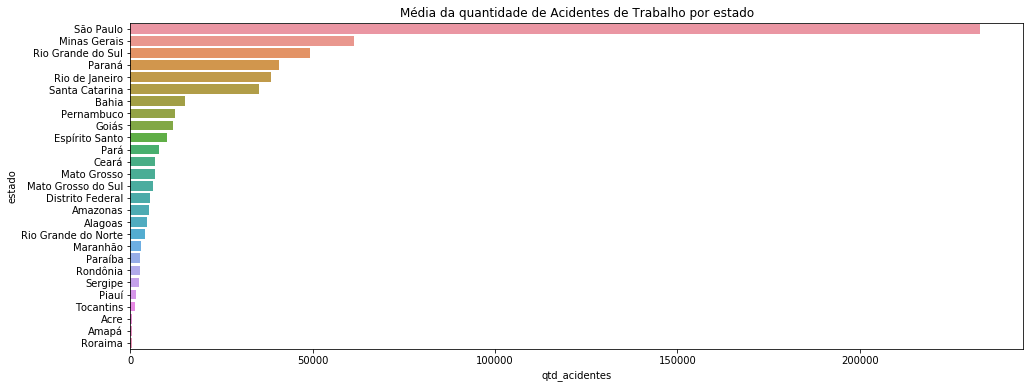

In [18]:
plt.figure(figsize = (16,6))
m = sns.barplot(y="estado",
                x ="qtd_acidentes",
                data = agrupado_media);
m.set_title("Média da quantidade de Acidentes de Trabalho por estado");


Os estados foram divididos por regiões de forma a melhorar a visualização do gráfico interativo abaixo.

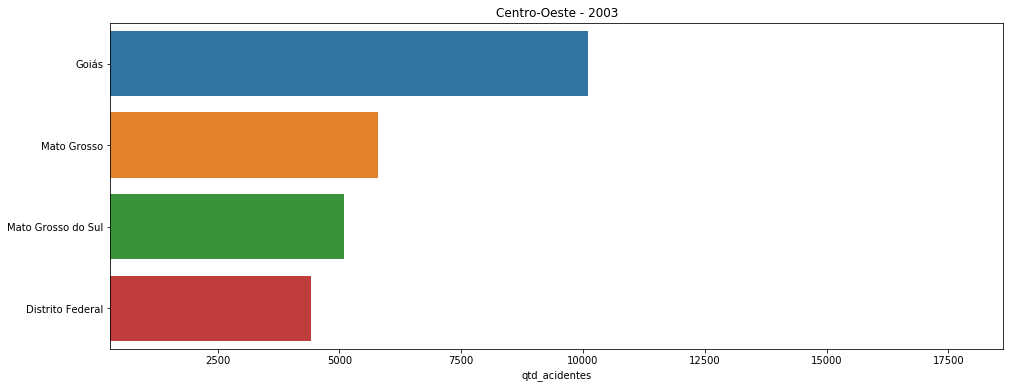

In [19]:
#@title Estados com mais acidentes por região por ano { run: "auto" }
ano = 2003 #@param {type:"slider", min:1988, max:2016, step:1}
regiao = "Centro-Oeste" #@param ["Norte", "Nordeste", "Sudeste", "Sul", "Centro-Oeste"]

#agrupando o df por regiao
agrupado_regiao = agrupado[agrupado["regiao"]==regiao]

#criando o df para ser plotado
data = agrupado[agrupado["regiao"]==regiao]
data = data[data["ano"]==ano]
data.sort_values("qtd_acidentes",inplace=True,ascending=False)

#plotando
plt.figure(figsize =(16,6))
p = sns.barplot(y=list(data.estado.unique()),
                  x="qtd_acidentes",
                  data=data);
p.set_xlim(min(agrupado_regiao.qtd_acidentes)
           ,max(agrupado_regiao.qtd_acidentes))
p.set_title(regiao + " - "+str(ano));


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1152x432 with 0 Axes>

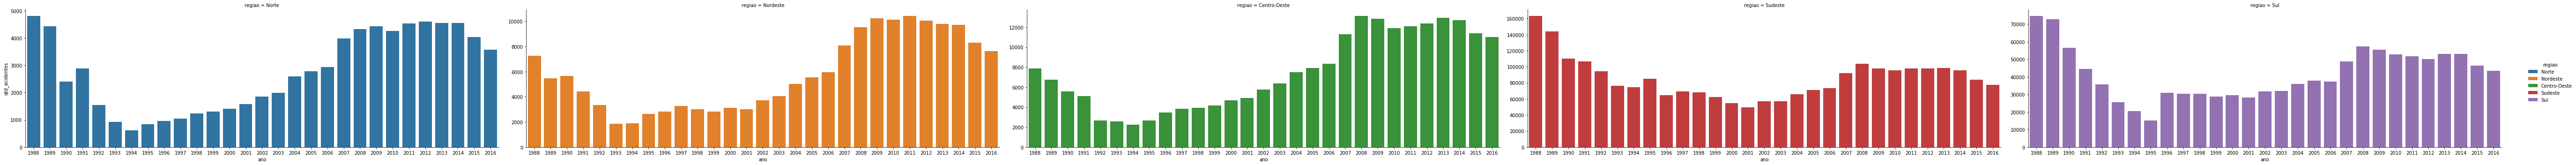

In [20]:
plt.figure(figsize=(16, 6))
g = sns.FacetGrid(agrupado,
                  col="regiao",
                  size = 5,
                  aspect = 3,
                  sharey=False,
                  hue = "regiao");


g.map_dataframe(sns.barplot,'ano',"qtd_acidentes",ci = None).add_legend()


No que diz respeito as médias. As regiões Norte, Nordeste e Centro-Oeste apresentaram um comportamento parecido ao longo dos anos. O comportamento é descrito como uma queda na quantidade de acidentes no início da decada de 90 e logo seguido por uma crescente até 2016. Este comportamento não foi observado nas regiões, Sul e Sudeste. A região Sudeste vinha em queda até 2001. de 2002 a 2013, o Sudeste experimentou um aumento de mais de 40000 acidentes. Desde então a região têm presenciado um progresso na área. A história é parecida para a região Sul.

### Zero Acidentes

Onde será que tivemos zero acidentes?

In [21]:
#Criando a tabela de zero acidentes
zero_acidentes = df_uf[df_uf['qtd_acidentes']==0]
zero_acidentes.sort_values(["regiao",
                            "estado",
                            "ano"]).drop(labels=["latitude",
                                                 "longitude",
                                                 "cod_estado",
                                                 "uf"],axis=1)

,ano,estado,motivo/situação,qtd_acidentes,regiao
2347,1993,Mato Grosso,Trajeto-Com Cat,0.0,Centro-Oeste
1075,1989,Alagoas,Doença do Trabalho-Com Cat,0.0,Nordeste
1078,1990,Alagoas,Doença do Trabalho-Com Cat,0.0,Nordeste
434,1990,Maranhão,Doença do Trabalho-Com Cat,0.0,Nordeste
437,1991,Maranhão,Doença do Trabalho-Com Cat,0.0,Nordeste
446,1994,Maranhão,Doença do Trabalho-Com Cat,0.0,Nordeste
449,1995,Maranhão,Doença do Trabalho-Com Cat,0.0,Nordeste
527,1988,Piauí,Doença do Trabalho-Com Cat,0.0,Nordeste
539,1992,Piauí,Doença do Trabalho-Com Cat,0.0,Nordeste
548,1995,Piauí,Doença do Trabalho-Com Cat,0.0,Nordeste


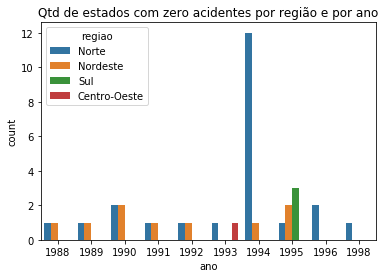

In [22]:
p = sns.countplot(x="ano",hue="regiao",data=zero_acidentes)
p.set_title("Qtd de estados com zero acidentes por região e por ano");

Os estados do norte apresentam a maior prevalência de anos sem acidente de qualquer tipo. Porém nenhum estado passou um ano sem acidente desde 1998, como mostra o grafico acima. Fica evidenciado também que o sudeste não teve  nenhum ano sem acidentes.

No entanto na maioria dos anos em que não ocorreram acidentes de trabalho, a não ocorrência diz respeito ao motivo de doença de trabalho. Os anos em que tivemos zero acidentes de qualquer tipo são mostrados na tabela abaixo:

In [23]:
zero_acidentes.groupby(['regiao','ano'])[["motivo/situação"]].nunique()

motivo/situação
regiao       ano                  
Centro-Oeste 1993                1
Nordeste     1988                1
             1989                1
             1990                1
             1991                1
             1992                1
             1994                1
             1995                1
Norte        1988                1
             1989                1
             1990                1
             1991                1
             1992                1
             1993                1
             1994                3
             1995                1
             1996                1
             1998                1
Sul          1995                3

Infelizmente, não tivemos nenhum ano com nenhum tipo de acidente, em região nenhuma do país(se tivessemos encontrariamos alguma linha da tabela indicando as 4 categorias da coluna "motivo/situação").

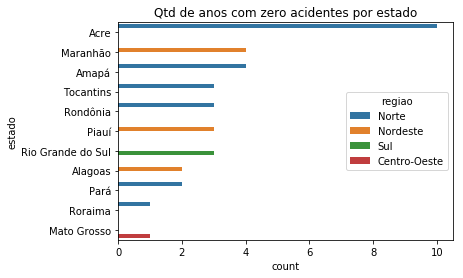

In [24]:
p = sns.countplot(y="estado",
                  data = zero_acidentes,
                  hue = "regiao",
              order = zero_acidentes['estado'].value_counts().index)
p.set_title("Qtd de anos com zero acidentes por estado");

O Acre foi, de longe, o estado que teve a maior quantidade de anos sem registrar acidentes. 

---

(cruzar essa informação com quantidade de postos de trabalho, população e postos de trabalho irregular )

### O maior número de acidentes registrado

Onde será que tivemos a maior quantidade de acidentes registrados?

In [25]:
#selecionando a linha com o maior número de acidentes registrado
df_uf[df_uf['qtd_acidentes']==419981]

,ano,estado,motivo/situação,qtd_acidentes,latitude,longitude,cod_estado,uf,regiao
1749,1988,São Paulo,Típico-Com Cat,419981.0,-23.5329,-46.6395,35,SP,Sudeste


1988 foi um ano tenso para São Paulo, que chegou a registrar um número tão expressivo de acidentes. O que traz o questionamento a respeito de como é a série histórica da maior metrópole brasileira. 

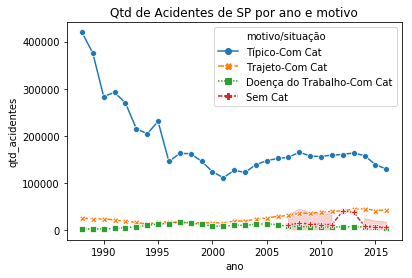

In [26]:
p = sns.lineplot(x="ano",
             y = "qtd_acidentes",
             hue = "motivo/situação",
             style ="motivo/situação" ,
             markers =True ,
             data=df_uf[df_uf["estado"]=="São Paulo"])
p.set_title("Qtd de Acidentes de SP por ano e motivo");

É possivel observar uma tendência de queda na quantidade de acidentes Típicos-com Cat(que são maioria) até os anos 2000. O que levanta uma outra questão. Como se comporta a queda de São Paulo com relação a média regional?

In [0]:
#fazendo a média da região
mean_regiao = df_uf[df_uf["estado"]!="São Paulo"].groupby(by = ["regiao","motivo/situação","ano"])[["qtd_acidentes"]].mean()
mean_regiao.reset_index(inplace = True)


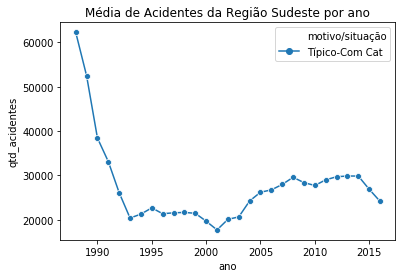

In [28]:

#plotando os dados
p = sns.lineplot(x="ano",
             y = "qtd_acidentes",
             hue = "motivo/situação",
             style ="motivo/situação" ,
             markers =True ,
             data=mean_regiao[(mean_regiao["regiao"]=="Sudeste")&
                             (mean_regiao["motivo/situação"]=="Típico-Com Cat")])
p.set_title("Média de Acidentes da Região Sudeste por ano");

In [0]:
#Criar gráfico que sobreponha a média da região com os valores de sp

### Distribuição da quantidade de acidentes por região

Observando a série histórica de todas as regiões do país é necessário se fazer uma analise em função do Log da quantidade de acidentes. Isso decorre do fato que a quantidade de acidentes é muito discrepante de região para região, como pode ser observado no gráfico abaixo

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


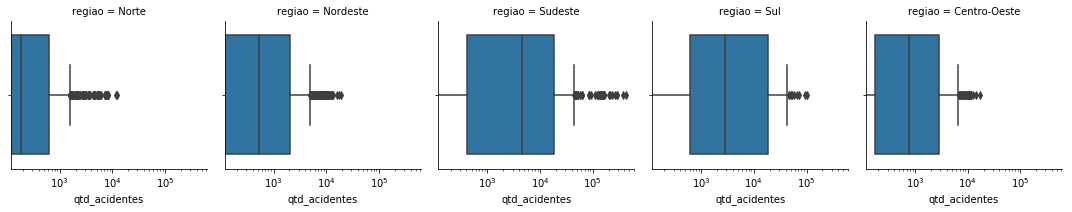

In [30]:
g = sns.FacetGrid(df_uf, col="regiao") 
g.map(sns.boxplot, "qtd_acidentes")
plt.xscale("log");

A região sudeste apresenta a distribuição mais concentrada nos valores entre $10^3$ e $10^4$, assim como a região sul. O que não é verdade para as outras regiões do pais que possuem os valores mais próximos da ordem de $10^2$ e $10^3$


### O mapa dos acidentes de trabalho

Agora com uma base de dados com as informações de latitude e longitude, meu objetivo é tentar retirar algumas informações com base na leitura de alguns mapas. Para isso usarei a biblioteca do Python Folium

In [0]:
import folium

In [32]:
#@title  { run: "auto" }
ano = 2010 #@param {type:"slider", min:1988, max:2016, step:1}
df_uf_map = df_uf[df_uf["ano"]==ano]
df_uf_map = df_uf_map.groupby(['estado',
                                 'latitude',
                                 'longitude'],
                                as_index=False)[['qtd_acidentes']].sum()
df_uf_map.qtd_acidentes = df_uf_map.qtd_acidentes.astype("int64")




ac_map = folium.Map(location=[-16.1237611, -59.9219642],
                    zoom_start=4)
for i in range(0,len(df_uf_map)):
  folium.CircleMarker(
      location =[df_uf_map.iloc[i]['latitude'],
                 df_uf_map.iloc[i]['longitude']],
      popup = df_uf_map.iloc[i]['estado']+' ; '+df_uf_map.iloc[i]['qtd_acidentes'].astype('str'),
      radius=int(df_uf_map.iloc[i]['qtd_acidentes']/5000),
      fill_color="crimson"
  ).add_to(ac_map)


ac_map



O mapa nos da um melhor compreendimento do que vem acontecendo ao longo dos anos com relação aos acidentes de trabalho

In [33]:
from folium.plugins import HeatMap
heat_map = folium.Map(location=[-16.1237611, -59.9219642],
                    zoom_start=4)

heat_data = df_uf_map.drop(["estado"],axis=1)

media_acidentes = heat_data.qtd_acidentes.mean()
desvio_acidentes = heat_data.qtd_acidentes.std()

heat_data["qtd_acidentes"]=(heat_data.qtd_acidentes-media_acidentes)/desvio_acidentes


HeatMap( list(zip(heat_data.latitude.values, heat_data.longitude.values,heat_data.qtd_acidentes.values)),
        max_zoom=1).add_to(heat_map)

heat_map

## Acidentes de Trabalho por Sexo e Faixa Etária

In [0]:
url = "https://raw.githubusercontent.com/lorransr/CAT/master/ACT-faixaetaria-sexo.csv"

In [0]:
df_agesex = pd.read_csv(url, sep=",", encoding = "latin-1")

In [90]:
df_agesex.head()

,Ano,Idade,Motivo/Situação,Sexo,Qte Acidentes,Situação
0,1997,Até 19 Anos,Típico-Com Cat,Masculino,7581,Com Cat Registrada
1,1997,Até 19 Anos,Típico-Com Cat,Feminino,1061,Com Cat Registrada
2,1997,Até 19 Anos,Típico-Com Cat,Ignorado,18851,Com Cat Registrada
3,1997,20 a 24 Anos,Típico-Com Cat,Masculino,15847,Com Cat Registrada
4,1997,20 a 24 Anos,Típico-Com Cat,Feminino,1934,Com Cat Registrada


O dataframe em questão agora contém os registros de acidente de trabalho por faixa etaria e sexo.

In [0]:
df_agesex.columns = ["ano",
                     "idade",
                     "motivo/situacao",
                     "sexo",
                     "qtd_acidentes",
                     "situacao"]

In [92]:
df_agesex.idade.value_counts()

70 Anos e Mais    1073
40 a 44 Anos       719
45 a 49 Anos       716
35 a 39 Anos       715
25 a 29 Anos       706
50 a 54 Anos       705
20 a 24 Anos       703
30 a 34 Anos       703
55 a 59 Anos       673
Até 19 Anos        655
60 a 64 Anos       606
65 a 69 Anos       526
Ignorada           234
-                    1
Name: idade, dtype: int64

No que diz respeito a idade, existe um valor sem registro, que pode ser ignorado.

In [0]:
df_agesex = df_agesex[df_agesex.idade != "-"]

In [94]:
df_agesex.situacao.value_counts()

Com Cat Registrada    5991
Sem Cat Registrada    2743
Name: situacao, dtype: int64

A princípio era de se esperar que a maior quantidade de acidentes de trabalho possuissem a CAT registrada, em vista da obrigação legal da empresa em emiti-la

In [95]:
#checando se existem valores nulos em alguma coluna
df_agesex.isnull().values.any()

False

In [96]:
df_agesex.dtypes

ano                object
idade              object
motivo/situacao    object
sexo               object
qtd_acidentes      object
situacao           object
dtype: object

In [0]:
df_agesex[["ano","qtd_acidentes"]] = df_agesex[["ano","qtd_acidentes"]].astype("int")

In [0]:
df_agesex=df_agesex[df_agesex["sexo"]!="Ignorado"]
df_agesex=df_agesex[df_agesex["idade"]!="Ignorada"]

In [109]:
df_agesex.shape

(8131, 6)

In [110]:
df_agesex.groupby(by = "idade")[["qtd_acidentes"]].describe()

qtd_acidentes                                                 \
                       count         mean          std  min     25%     50%   
idade                                                                         
20 a 24 Anos           661.0  2651.131619  6181.044315  1.0   53.00   939.0   
25 a 29 Anos           667.0  2885.683658  5950.099509  1.0  133.00  1353.0   
30 a 34 Anos           668.0  2622.146707  5048.744877  1.0  208.00  1433.0   
35 a 39 Anos           680.0  2187.830882  4201.590026  1.0   38.25  1112.5   
40 a 44 Anos           686.0  1804.112245  3333.370382  1.0   40.25   816.5   
45 a 49 Anos           688.0  1439.876453  2440.726048  1.0   37.50   648.0   
50 a 54 Anos           675.0  1027.051852  1570.484413  1.0   77.50   452.0   
55 a 59 Anos           646.0   595.404025   897.823103  1.0   40.25   270.0   
60 a 64 Anos           582.0   240.125430   386.493842  1.0   22.00    90.0   
65 a 69 Anos           502.0    58.970120   104.799348  1.0   10.00    24.0   
70 Anos e Mais        1049.0     8.307912    20.398874  0.0    1.00     3.0   
Até 19 Anos            627.0   625.923445  1865.610937  1.0    5.00    52.0   

                                  
                    75%      max  
idade                             
20 a 24 Anos    2470.00  61309.0  
25 a 29 Anos    2816.50  59787.0  
30 a 34 Anos    2684.75  48054.0  
35 a 39 Anos    2459.25  40561.0  
40 a 44 Anos    2212.00  32276.0  
45 a 49 Anos    1889.00  23760.0  
50 a 54 Anos    1436.50  14567.0  
55 a 59 Anos     762.75   7300.0  
60 a 64 Anos     288.50   2836.0  
65 a 69 Anos      54.00    740.0  
70 Anos e Mais     7.00    242.0  
Até 19 Anos      386.00  19839.0

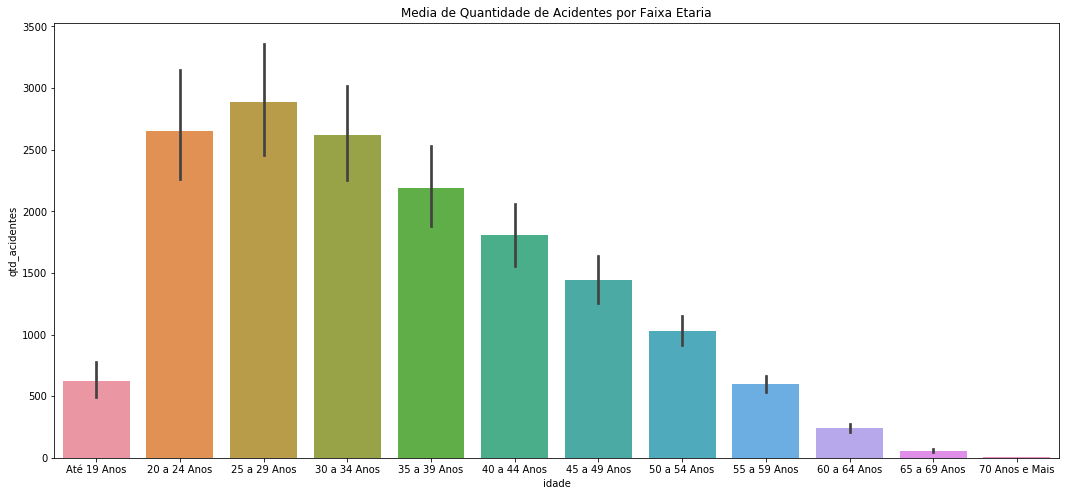

In [111]:
plt.figure(figsize = (18,8))
g = sns.barplot(data = df_agesex,
                x = "idade",
                y = "qtd_acidentes")
g.set_title("Media de Quantidade de Acidentes por Faixa Etaria");


A princípio é possivel se observar que em média, os acidentes acontecem em sua grande maioria na faixa dos 19 até os 39 anos. O que chama bastante a atenção é o fato de que até os 19 anos possuir uma quantidade tão alta de acidentes. Menores de idade não podem trabalhar, estagiários possuem diversas limitações em suas atividades, assim como jovens aprendizes. No entanto, a quantidade de acidentes registrado pra essa faixa etaria tão pequena (apenas 2 anos) é tão representativa quanto a média dos trabalhadores de 55 a 59 anos..

In [112]:
df_agesex.groupby(by = "sexo")[["qtd_acidentes"]].describe()

qtd_acidentes                                                     \
                  count         mean          std  min  25%    50%     75%   
sexo                                                                         
Feminino         3797.0   765.427443  1261.500448  0.0  7.0  212.0  1173.0   
Masculino        4334.0  1819.753576  4663.917412  0.0  7.0  202.5  1851.0   

                    
               max  
sexo                
Feminino   13023.0  
Masculino  61309.0

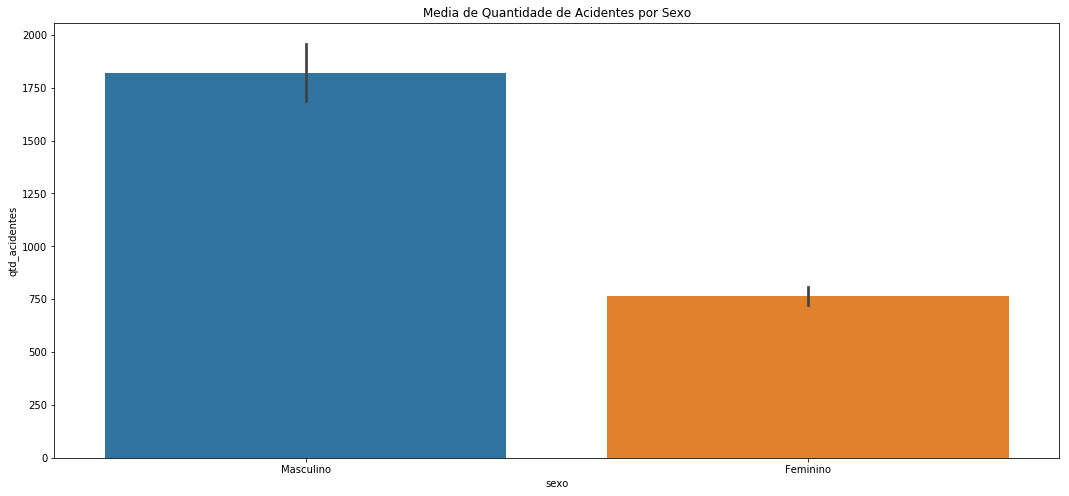

In [113]:
plt.figure(figsize = (18,8))
g = sns.barplot(data = df_agesex,
                x = "sexo",
                y = "qtd_acidentes")
g.set_title("Media de Quantidade de Acidentes por Sexo");

Em média os homens se acidentam 25,x mais que as mulheres. No entanto, Ate o terceiro quartil (75%) a quantidade de acidentes para os dois sexos é parecida. Nesse sentido é interessante observar, também, que a distribuição dos acidentes de trabalho que ocorrem com mulheres ao longo dos anos possuem  uma distribuição mais apertada, em relação aos homens.

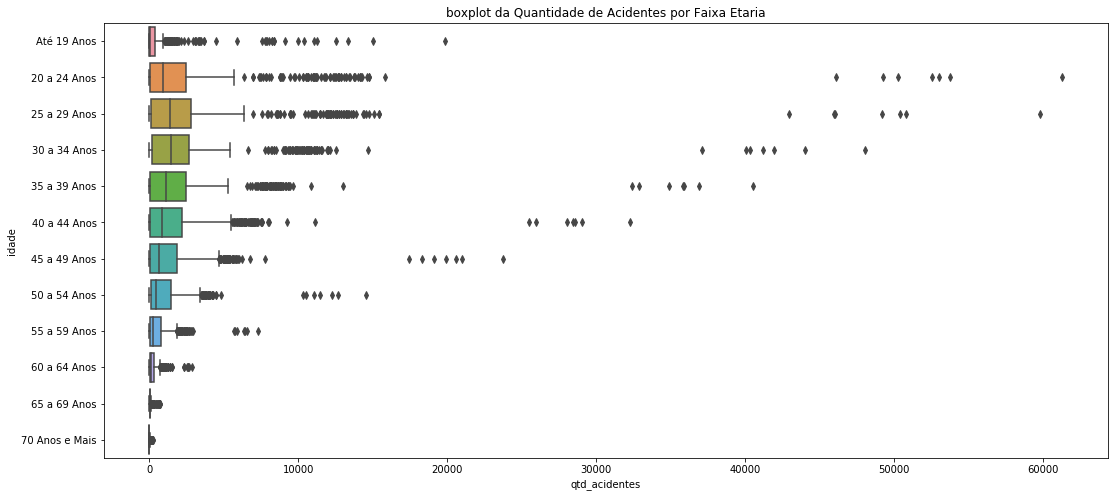

In [116]:
plt.figure(figsize = (18,8))

g = sns.boxplot(data = df_agesex,
                y = "idade",
                x = "qtd_acidentes")
g.set_title("boxplot da Quantidade de Acidentes por Faixa Etaria");


Como pode ser observado, os acidentes por faixa etaria tem uma natureza desperça com diversos outliers. Para entender melhor os dados será necessária a observação da faixa etaria e contrasta-la por sexo.

0

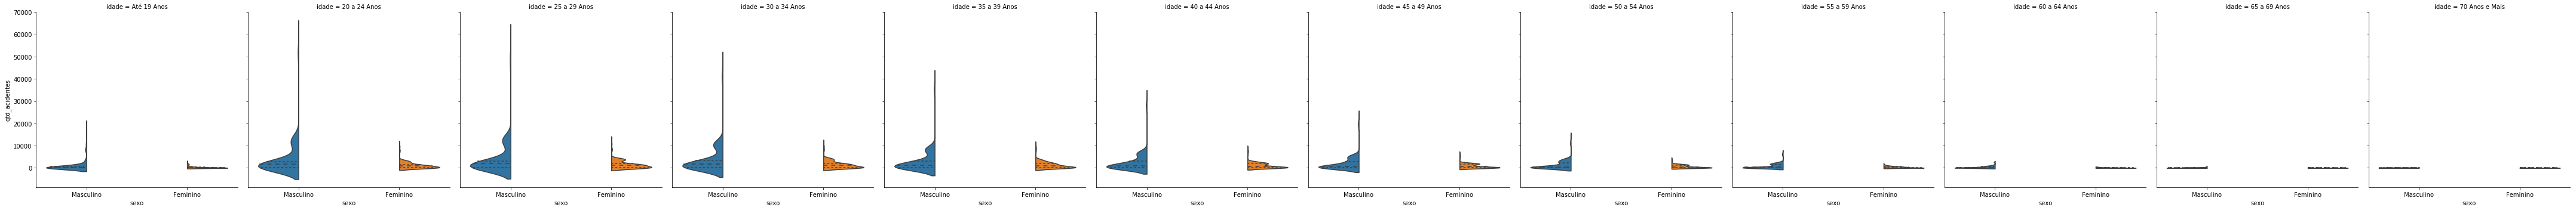

In [193]:
g = sns.catplot(x = "sexo",
                y = "qtd_acidentes",
                data = df_agesex,
                col = "idade",
                kind = "violin",
                hue = "sexo",
                split = True,
                inner = "quartile")

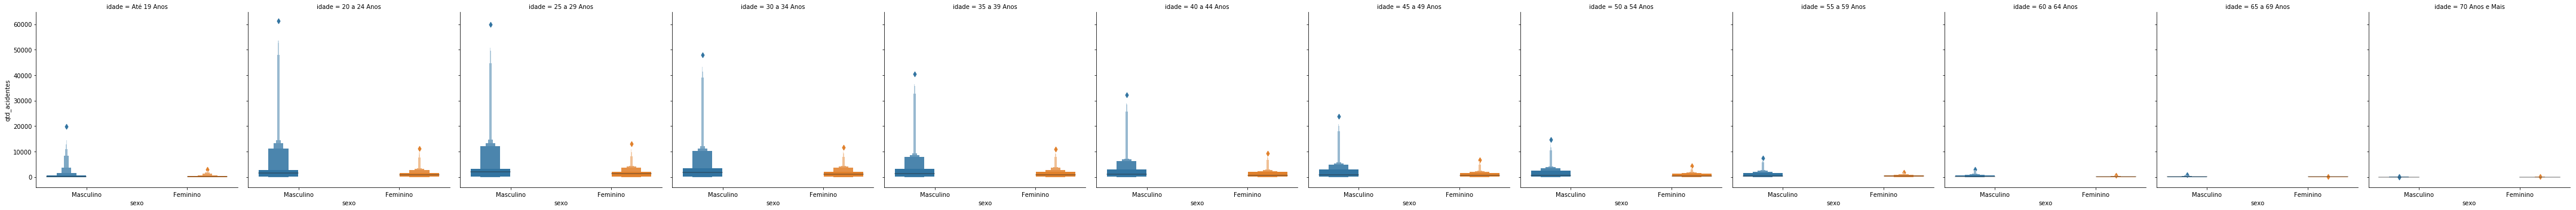

In [203]:
ax = sns.catplot(x = "sexo",
                y = "qtd_acidentes",
                data = df_agesex,
                col = "idade",
                kind = "boxen",
                hue = "sexo")


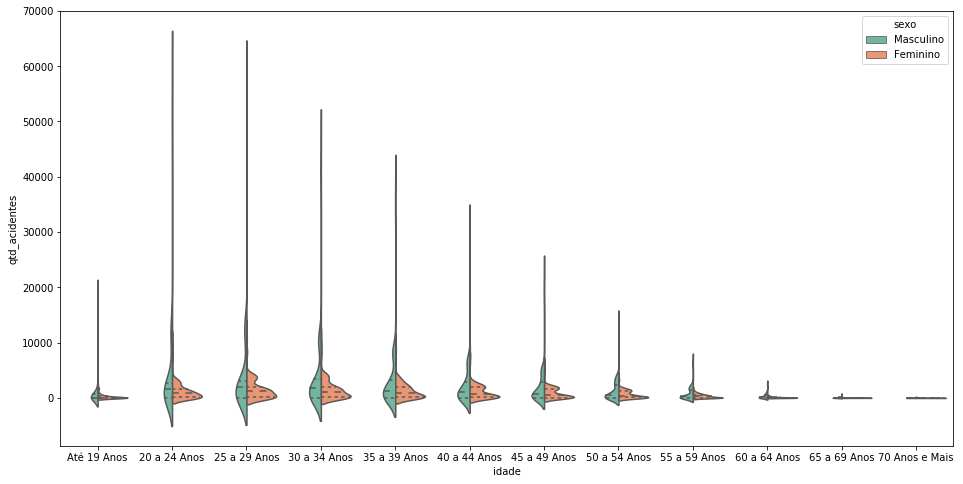

In [140]:
g = sns.FacetGrid(data = df_agesex,
                 row = "idade")
g = sns.violinplot(x="idade",
                   y="qtd_acidentes",
                   hue="sexo",
                   data=df_agesex,
                   palette="Set2",
                   split=True,
                   inner="quartile")


In [205]:
df_agesex.unique()

AttributeError: ignored

In [0]:
df_agesex["piram"]=df_agesex[["qtd_acidentes","sexo"]].apply(lambda x:
                                                             x["qtd_acidentes"] if x["sexo"]=="Feminino" else x["qtd_acidentes"]*(-1),
                                                             axis =1)

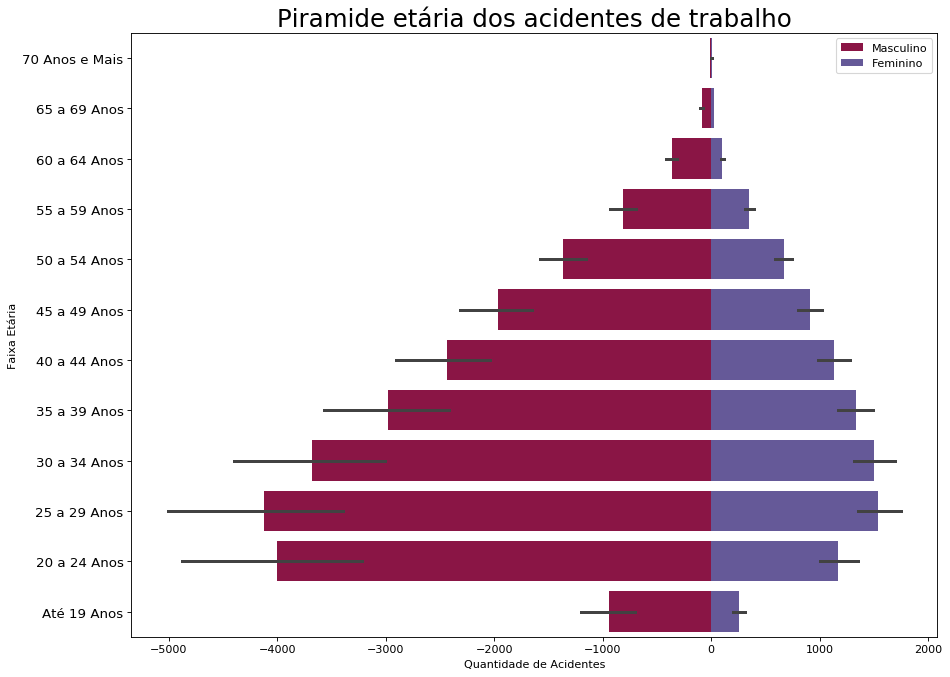

In [219]:
#desenhando a figura
plt.figure(figsize=(13,10), dpi= 80)
group_col = 'sexo'
order_of_bars = df_agesex.idade.unique()[::-1]
colors = [plt.cm.Spectral(i/float(len(df_agesex[group_col].unique())-1)) for i in range(len(df_agesex[group_col].unique()))]

for c, group in zip(colors, df_agesex[group_col].unique()):
    sns.barplot(x='piram', y='idade', data=df_agesex.loc[df_agesex[group_col]==group, :], order=order_of_bars, color=c, label=group)
    
#decorativo
plt.xlabel("Quantidade de Acidentes")
plt.ylabel("Faixa Etária")
plt.yticks(fontsize=12)
plt.title("Piramide etária dos acidentes de trabalho", fontsize=22)
plt.legend()
plt.show()
